In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def pegasos_svm(label, feature, _lambda=0.01, _T=1000):
    n, d = feature.shape
    w = np.zeros(d)
    for t in range(1, _T + 1):
        i = np.random.randint(n)
        eta = 1 / (_lambda * t)
        if label[i] * np.dot(w, feature[i]) < 1:
            w = (1 - eta * _lambda) * w + eta * label[i] * feature[i]
        else:
            w = (1 - eta * _lambda) * w
    return w

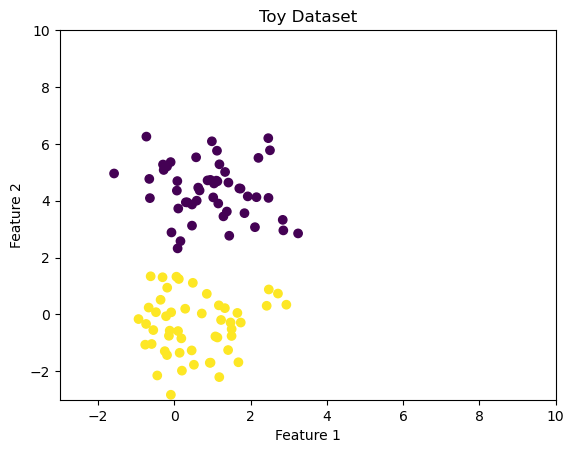

In [27]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
y = np.where(y == 0, -1, y)
X[y == 0] = X[y == 0] + 1.5
X[y == 1] = X[y == 1] - 1.5

X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
y = y*2 - 1

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlim((-3, 10))
plt.ylim((-3, 10))
plt.title('Toy Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

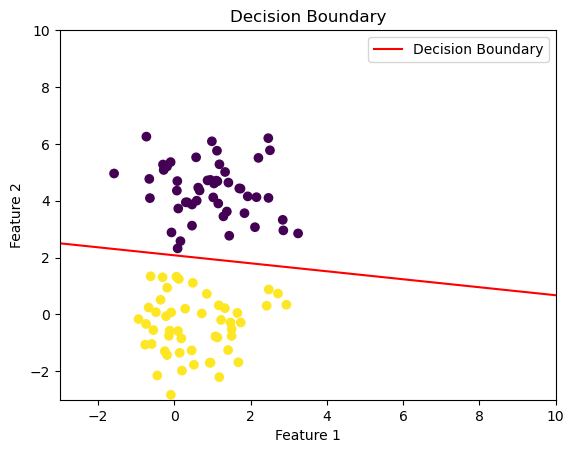

In [28]:
w = pegasos_svm(y, X, 0.001, 100000)

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlim((-3, 10))
plt.ylim((-3, 10))

# Decision boundary is defined by w[0]*x + w[1]*y + w[2] = 0
# Rearranging for y: y = (-w[0]/w[1])*x - w[2]/w[1]
x_boundary = np.array([-3, 10])
if w[1]!=0:
  y_boundary = (-w[0]/w[1])*x_boundary - w[2]/w[1]
  plt.plot(x_boundary, y_boundary, color='red', label='Decision Boundary')

plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [29]:
# SVC from sklearn
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X, y)

print("Weights:", model.coef_)
print("Intercept:", model.intercept_)

Weights: [[-2.12649856e-01 -1.49672972e+00 -5.55111512e-17]]
Intercept: [2.89220854]


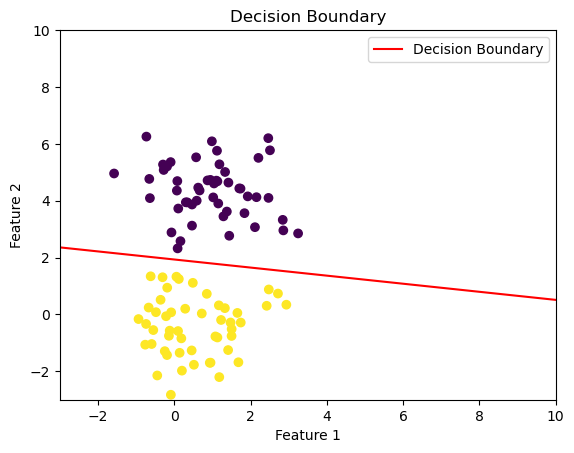

In [30]:
# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlim((-3, 10))
plt.ylim((-3, 10))

# Decision boundary is defined by w[0]*x + w[1]*y + w[2] = 0
# Rearranging for y: y = (-w[0]/w[1])*x - w[2]/w[1]
w = model.coef_[0]
b = model.intercept_
x_boundary = np.array([-3, 10])
if w[1]!=0:
  y_boundary = (-w[0]/w[1])*x_boundary - b/w[1]
  plt.plot(x_boundary, y_boundary, color='red', label='Decision Boundary')

plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()